## Random Forest Classifier and Regressor Machine Learning

### What is RandomForest?

Random forest has a variety of applications such as recommendation engines,image classification and feature selection.It can be used to classify loyal loan applicants,identify fraud activity and predict diseases.RandomForest are made of Decision Trees, decision trees are easy to use and easy to interpret but in practice they are not awesome as we know decision trees has large variance and low bias that is reason for overfitting but the good news is that Random Forests combine the simplicity of decision trees with 
<img src='rf.JPG'>

### Algorithm:
<img src='2.JPG'>
- `Stage 1`: To create a `bootstrapped dataset` that is the same size as original, we randomly select samples from the original dataset.Important detail is that `we are allowed to pick the same sample more than once.` split each Bootstraps in to training and testing data.


- `Stage 2`: Create n DecisionTree based on these bootstrap.


- `Stage 3`: Use test data to predict class.


- `Stage 4`: Vote for majority predictive class.

### Important Feature For Classification:
we can choose best feature Node using Gini index,Entropy and information gain calculation method. Feature with less `Gini score` choose as main node. To understand this in better way you should have information about decision tree design. 
### Random Forest vs Decision Trees:
- Random Forest is set of multiple decision trees.
- Deep decision trees may suffer from overffiting but Random Forests `does not overfit`. The testing performance of Random Forests does not decrease (due to overfitting) as the number of trees increases. Hence after certain number of trees the performance tend to stay in a certain value.
- Decision trees are computationally faster.
- Random Forests is difficult to interpret, while decision tree easily interpretable.

### Random Forest as a Regression with diabities dataset:
In case of Regressor we took `Mean or Median` of our decision trees output.


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [74]:
from sklearn import datasets,metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [75]:
diabities = datasets.load_diabetes()
print(diabities.keys())

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [76]:
print(diabities.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [77]:
X = diabities.data
y = diabities.target
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.30,random_state=42)
regressor = RandomForestRegressor(n_estimators=100,random_state=42)
regressor.fit(X_train, y_train)
y_predict = regressor.predict(X_test)

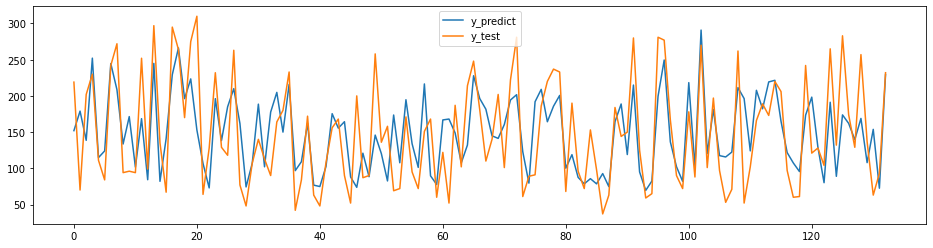

In [78]:
plt.figure(figsize=(16,4))
plt.plot(y_predict,label='y_predict')
plt.plot(y_test,label='y_test')
plt.legend(loc='upper center')

In [79]:
np.sqrt(metrics.mean_squared_error(y_test,y_predict))

53.505825893179875

In decision tree we get error more than 70 for the same problem

In [80]:
y_test.std()

73.47317715932746

we can see that error is less than actual value of y (y_test) so we can say that this is pretty good model.

### Random Forest Classifier with iris dataset:

In [85]:
from sklearn.ensemble import RandomForestClassifier
iris = datasets.load_iris()

In [86]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [89]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [96]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [94]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [97]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [104]:
X = iris.data
y = iris.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.33,random_state=42)
Classifier = RandomForestClassifier(n_estimators=100,random_state=42)
classifier.fit(X_train,y_train)
y_predict = classifier.predict(X_test)

In [105]:
y_predict

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

(array([19.,  0.,  0.,  0.,  0., 16.,  0.,  0.,  0., 15.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

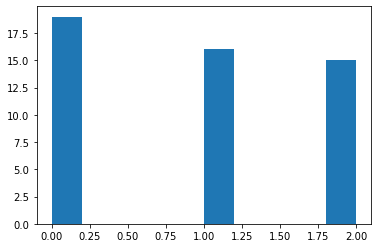

In [106]:
plt.hist(y_predict)

In [107]:
print(metrics.accuracy_score(y_test,y_predict))

0.98


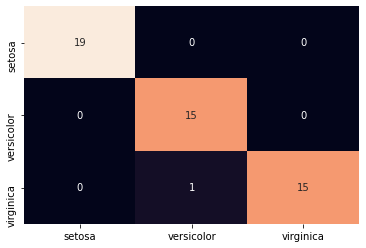

In [111]:
 mat = metrics.confusion_matrix(y_test,y_predict)
sns.heatmap(mat,annot=True,cbar=False,xticklabels=iris.target_names,yticklabels=iris.target_names)

In [108]:
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [114]:
# features Ranking
classifier.feature_importances_

array([0.09966969, 0.03963944, 0.43169413, 0.42899674])

### Pros and Cons:

- It does not suffer from overfitting problem the reasons is it takes the average of all the prediction which can source of the bias.
- Use as a classification and Regression both problems.
- Disadvantages of RandomForest is that it is slow in generating predictions because it has multiple decision trees.